In [1]:
import numpy as np
import pandas as pd

## Object creation

In [2]:
s = pd.Series([1,3,5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6,4), index = dates, columns = list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.708186,0.736150,-0.882572,0.876294
2013-01-02,0.362363,0.076098,0.337789,-1.197852
2013-01-03,1.083077,-0.205427,2.287904,-1.035044
2013-01-04,0.543255,1.046272,1.077819,0.106738
2013-01-05,-0.746939,0.323703,0.548389,-1.635349
2013-01-06,1.486335,0.120190,-1.346073,-0.499906


In [7]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [8]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

df2.<TAB>

## Viewing data

In [13]:
df.head()

,A,B,C,D
2013-01-01,-0.708186,0.736150,-0.882572,0.876294
2013-01-02,0.362363,0.076098,0.337789,-1.197852
2013-01-03,1.083077,-0.205427,2.287904,-1.035044
2013-01-04,0.543255,1.046272,1.077819,0.106738
2013-01-05,-0.746939,0.323703,0.548389,-1.635349


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,0.543255,1.046272,1.077819,0.106738
2013-01-05,-0.746939,0.323703,0.548389,-1.635349
2013-01-06,1.486335,0.120190,-1.346073,-0.499906


In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.to_numpy()

array([[-0.7081858 ,  0.73614976, -0.88257211,  0.87629409],
       [ 0.36236332,  0.07609781,  0.33778931, -1.19785246],
       [ 1.08307737, -0.20542664,  2.28790351, -1.03504367],
       [ 0.54325456,  1.04627198,  1.07781853,  0.10673772],
       [-0.74693935,  0.32370295,  0.54838878, -1.63534887],
       [ 1.4863354 ,  0.12019003, -1.34607252, -0.49990585]])

In [18]:
df2.to_numpy() # DataFrame.to_numpy() does not include the index or column labels in the output.

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [19]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.336651,0.349498,0.337209,-0.564187
std,0.915219,0.462802,1.320576,0.927349
min,-0.746939,-0.205427,-1.346073,-1.635349
25%,-0.440549,0.087121,-0.577482,-1.157150
50%,0.452809,0.221946,0.443089,-0.767475
75%,0.948122,0.633038,0.945461,-0.044923
max,1.486335,1.046272,2.287904,0.876294


In [20]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.708186,0.362363,1.083077,0.543255,-0.746939,1.486335
B,0.736150,0.076098,-0.205427,1.046272,0.323703,0.120190
C,-0.882572,0.337789,2.287904,1.077819,0.548389,-1.346073
D,0.876294,-1.197852,-1.035044,0.106738,-1.635349,-0.499906


In [21]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.876294,-0.882572,0.736150,-0.708186
2013-01-02,-1.197852,0.337789,0.076098,0.362363
2013-01-03,-1.035044,2.287904,-0.205427,1.083077
2013-01-04,0.106738,1.077819,1.046272,0.543255
2013-01-05,-1.635349,0.548389,0.323703,-0.746939
2013-01-06,-0.499906,-1.346073,0.120190,1.486335


In [22]:
df.sort_values(by="B")

,A,B,C,D
2013-01-03,1.083077,-0.205427,2.287904,-1.035044
2013-01-02,0.362363,0.076098,0.337789,-1.197852
2013-01-06,1.486335,0.120190,-1.346073,-0.499906
2013-01-05,-0.746939,0.323703,0.548389,-1.635349
2013-01-01,-0.708186,0.736150,-0.882572,0.876294
2013-01-04,0.543255,1.046272,1.077819,0.106738


## Selection

In [23]:
df["A"]

2013-01-01   -0.708186
2013-01-02    0.362363
2013-01-03    1.083077
2013-01-04    0.543255
2013-01-05   -0.746939
2013-01-06    1.486335
Freq: D, Name: A, dtype: float64

In [24]:
df[0:3]

,A,B,C,D
2013-01-01,-0.708186,0.736150,-0.882572,0.876294
2013-01-02,0.362363,0.076098,0.337789,-1.197852
2013-01-03,1.083077,-0.205427,2.287904,-1.035044


In [25]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,0.362363,0.076098,0.337789,-1.197852
2013-01-03,1.083077,-0.205427,2.287904,-1.035044
2013-01-04,0.543255,1.046272,1.077819,0.106738


In [26]:
df.loc[dates[0]]

A   -0.708186
B    0.736150
C   -0.882572
D    0.876294
Name: 2013-01-01 00:00:00, dtype: float64

In [27]:
df.loc[:,["A","B"]]

,A,B
2013-01-01,-0.708186,0.736150
2013-01-02,0.362363,0.076098
2013-01-03,1.083077,-0.205427
2013-01-04,0.543255,1.046272
2013-01-05,-0.746939,0.323703
2013-01-06,1.486335,0.120190


In [28]:
df.loc["20130102":"20130104", ["A","B"]]

,A,B
2013-01-02,0.362363,0.076098
2013-01-03,1.083077,-0.205427
2013-01-04,0.543255,1.046272


In [29]:
df.loc["20130102",["A","B"]]

A    0.362363
B    0.076098
Name: 2013-01-02 00:00:00, dtype: float64

In [31]:
df.loc[dates[0],"A"]

-0.7081857983681427

In [32]:
df.at[dates[0],"A"]

-0.7081857983681427

## Selection by position

In [33]:
df.iloc[3]

A    0.543255
B    1.046272
C    1.077819
D    0.106738
Name: 2013-01-04 00:00:00, dtype: float64

In [34]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.543255,1.046272
2013-01-05,-0.746939,0.323703


In [35]:
df.iloc[[1,2,4], [0,2]]

,A,C
2013-01-02,0.362363,0.337789
2013-01-03,1.083077,2.287904
2013-01-05,-0.746939,0.548389


In [36]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.362363,0.076098,0.337789,-1.197852
2013-01-03,1.083077,-0.205427,2.287904,-1.035044


In [37]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.736150,-0.882572
2013-01-02,0.076098,0.337789
2013-01-03,-0.205427,2.287904
2013-01-04,1.046272,1.077819
2013-01-05,0.323703,0.548389
2013-01-06,0.120190,-1.346073


In [38]:
df.iloc[1,1]

0.07609780959009432

In [39]:
df.iat[1,1]

0.07609780959009432

## Boolean indexing

In [40]:
df[df["A"] > 0]

,A,B,C,D
2013-01-02,0.362363,0.076098,0.337789,-1.197852
2013-01-03,1.083077,-0.205427,2.287904,-1.035044
2013-01-04,0.543255,1.046272,1.077819,0.106738
2013-01-06,1.486335,0.120190,-1.346073,-0.499906


In [41]:
df[df>0]

,A,B,C,D
2013-01-01,NaN,0.736150,NaN,0.876294
2013-01-02,0.362363,0.076098,0.337789,NaN
2013-01-03,1.083077,NaN,2.287904,NaN
2013-01-04,0.543255,1.046272,1.077819,0.106738
2013-01-05,NaN,0.323703,0.548389,NaN
2013-01-06,1.486335,0.120190,NaN,NaN


In [43]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,-0.708186,0.736150,-0.882572,0.876294,one
2013-01-02,0.362363,0.076098,0.337789,-1.197852,one
2013-01-03,1.083077,-0.205427,2.287904,-1.035044,two
2013-01-04,0.543255,1.046272,1.077819,0.106738,three
2013-01-05,-0.746939,0.323703,0.548389,-1.635349,four
2013-01-06,1.486335,0.120190,-1.346073,-0.499906,three


In [44]:
df2[df2["E"].isin(["two","four"])]

,A,B,C,D,E
2013-01-03,1.083077,-0.205427,2.287904,-1.035044,two
2013-01-05,-0.746939,0.323703,0.548389,-1.635349,four


## Setting

In [45]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [46]:
df["F"] = s1

In [47]:
df.at[dates[0], "A"] = 0

In [48]:
df.iat[0,1] = 0

In [49]:
df.loc[:, "D"] = np.array([5] * len(df))

In [50]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.882572,5,NaN
2013-01-02,0.362363,0.076098,0.337789,5,1.0
2013-01-03,1.083077,-0.205427,2.287904,5,2.0
2013-01-04,0.543255,1.046272,1.077819,5,3.0
2013-01-05,-0.746939,0.323703,0.548389,5,4.0
2013-01-06,1.486335,0.120190,-1.346073,5,5.0


In [51]:
df2 = df.copy()

In [52]:
df2[df2 > 0] = -df2

In [53]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.882572,-5,NaN
2013-01-02,-0.362363,-0.076098,-0.337789,-5,-1.0
2013-01-03,-1.083077,-0.205427,-2.287904,-5,-2.0
2013-01-04,-0.543255,-1.046272,-1.077819,-5,-3.0
2013-01-05,-0.746939,-0.323703,-0.548389,-5,-4.0
2013-01-06,-1.486335,-0.120190,-1.346073,-5,-5.0


## Missing data

In [54]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

In [55]:
df1.loc[dates[0] : dates[1], "E"] = 1

In [56]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.882572,5,NaN,1.0
2013-01-02,0.362363,0.076098,0.337789,5,1.0,1.0
2013-01-03,1.083077,-0.205427,2.287904,5,2.0,NaN
2013-01-04,0.543255,1.046272,1.077819,5,3.0,NaN


In [57]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,0.362363,0.076098,0.337789,5,1.0,1.0


In [58]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.882572,5,5.0,1.0
2013-01-02,0.362363,0.076098,0.337789,5,1.0,1.0
2013-01-03,1.083077,-0.205427,2.287904,5,2.0,5.0
2013-01-04,0.543255,1.046272,1.077819,5,3.0,5.0


In [60]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

In [61]:
df.mean()

A    0.454682
B    0.226806
C    0.337209
D    5.000000
F    3.000000
dtype: float64

In [62]:
df.mean(1)

2013-01-01    1.029357
2013-01-02    1.355250
2013-01-03    2.033111
2013-01-04    2.133469
2013-01-05    1.825030
2013-01-06    2.052091
Freq: D, dtype: float64

In [63]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [64]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [65]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.083077,-1.205427,1.287904,4.0,1.0
2013-01-04,-2.456745,-1.953728,-1.922181,2.0,0.0
2013-01-05,-5.746939,-4.676297,-4.451611,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [66]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.882572,5,NaN
2013-01-02,0.362363,0.076098,-0.544783,10,1.0
2013-01-03,1.445441,-0.129329,1.743121,15,3.0
2013-01-04,1.988695,0.916943,2.820939,20,6.0
2013-01-05,1.241756,1.240646,3.369328,25,10.0
2013-01-06,2.728091,1.360836,2.023256,30,15.0


In [67]:
df.apply(lambda x: x.max() - x.min())

A    2.233275
B    1.251699
C    3.633976
D    0.000000
F    4.000000
dtype: float64

In [70]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    1
1    5
2    4
3    6
4    0
5    2
6    3
7    3
8    5
9    2
dtype: int32

In [71]:
s.value_counts()

5    2
2    2
3    2
1    1
4    1
6    1
0    1
dtype: int64

In [72]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

In [73]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,1.010433,-0.930561,-0.225859,-1.024739
1,-0.395518,-0.434104,0.430760,-0.018729
2,0.099005,-0.800510,-1.615590,-0.647634
3,-0.854039,-0.108581,-0.294870,0.511916
4,1.056747,0.308914,1.713274,0.601910
5,1.127845,0.404903,-0.438541,0.086538
6,0.485948,-1.290450,1.727285,-0.893686
7,0.654832,-0.861103,1.669678,1.685993
8,-0.832801,0.699354,-0.523044,0.079101
9,0.342527,0.276303,-0.527195,0.149796


In [74]:
pieces = [df[:3], df[3:7], df[7:]]

In [75]:
pd.concat(pieces)

,0,1,2,3
0,1.010433,-0.930561,-0.225859,-1.024739
1,-0.395518,-0.434104,0.430760,-0.018729
2,0.099005,-0.800510,-1.615590,-0.647634
3,-0.854039,-0.108581,-0.294870,0.511916
4,1.056747,0.308914,1.713274,0.601910
5,1.127845,0.404903,-0.438541,0.086538
6,0.485948,-1.290450,1.727285,-0.893686
7,0.654832,-0.861103,1.669678,1.685993
8,-0.832801,0.699354,-0.523044,0.079101
9,0.342527,0.276303,-0.527195,0.149796


In [79]:
left = pd.DataFrame({"key":["foo","foo"], "lval":[1,2]})
right = pd.DataFrame({"key":["foo","bar"], "rval":[4,5]})
left

,key,lval
0,foo,1
1,foo,2


In [80]:
right

,key,rval
0,foo,4
1,bar,5


In [81]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,2,4


## Grouping

In [83]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,0.097251,-0.866213
1,bar,one,0.813072,-0.678117
2,foo,two,-0.657680,-0.706953
3,bar,three,-0.963076,0.010519
4,foo,two,-1.518835,2.556884
5,bar,two,-0.435264,-0.608532
6,foo,one,0.979406,0.869081
7,foo,three,0.476028,-1.249984


In [84]:
df.groupby(["A","B"]).sum()

C         D
A   B                        
bar one    0.813072 -0.678117
    three -0.963076  0.010519
    two   -0.435264 -0.608532
foo one    1.076658  0.002868
    three  0.476028 -1.249984
    two   -2.176515  1.849932

## Reshaping

In [85]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)

In [86]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]

df2

A         B
first second                    
bar   one    -0.560328 -0.659407
      two    -0.965975 -0.362403
baz   one    -1.182561  2.076331
      two     1.251772 -0.305797

In [87]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.560328
               B   -0.659407
       two     A   -0.965975
               B   -0.362403
baz    one     A   -1.182561
               B    2.076331
       two     A    1.251772
               B   -0.305797
dtype: float64

In [90]:
stacked.unstack()

A         B
first second                    
bar   one    -0.560328 -0.659407
      two    -0.965975 -0.362403
baz   one    -1.182561  2.076331
      two     1.251772 -0.305797

In [91]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.560328 -0.965975
      B -0.659407 -0.362403
baz   A -1.182561  1.251772
      B  2.076331 -0.305797

In [92]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.560328 -1.182561
       B -0.659407  2.076331
two    A -0.965975  1.251772
       B -0.362403 -0.305797

In [94]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

df

,A,B,C,D,E
0,one,A,foo,1.054976,0.419123
1,one,B,foo,-0.259972,-0.698421
2,two,C,foo,-2.126981,-1.015508
3,three,A,bar,-1.542254,-1.395251
4,one,B,bar,-0.347550,0.707182
5,one,C,bar,-0.492913,0.803431
6,two,A,foo,0.285291,-0.562459
7,three,B,foo,-0.226216,0.783796
8,one,C,foo,0.329758,0.603419
9,one,A,bar,2.350160,0.840513


In [95]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  2.350160  1.054976
      B -0.347550 -0.259972
      C -0.492913  0.329758
three A -1.542254       NaN
      B       NaN -0.226216
      C -0.189086       NaN
two   A       NaN  0.285291
      B -0.102825       NaN
      C       NaN -2.126981

## Time series

In [96]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    27017
Freq: 5T, dtype: int32

In [97]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D") ## day
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.259624
2012-03-07    0.939457
2012-03-08    0.916240
2012-03-09    1.647766
2012-03-10    0.038870
Freq: D, dtype: float64

In [98]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00    0.259624
2012-03-07 00:00:00+00:00    0.939457
2012-03-08 00:00:00+00:00    0.916240
2012-03-09 00:00:00+00:00    1.647766
2012-03-10 00:00:00+00:00    0.038870
Freq: D, dtype: float64

In [99]:
ts_utc.tz_convert("US/Eastern") 

2012-03-05 19:00:00-05:00    0.259624
2012-03-06 19:00:00-05:00    0.939457
2012-03-07 19:00:00-05:00    0.916240
2012-03-08 19:00:00-05:00    1.647766
2012-03-09 19:00:00-05:00    0.038870
Freq: D, dtype: float64

In [100]:
rng = pd.date_range("1/1/2012", periods=5, freq="M") # month
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.247689
2012-02-29   -0.248358
2012-03-31    1.574750
2012-04-30   -1.717067
2012-05-31    0.517317
Freq: M, dtype: float64

In [101]:
ps = ts.to_period()
ps

2012-01   -0.247689
2012-02   -0.248358
2012-03    1.574750
2012-04   -1.717067
2012-05    0.517317
Freq: M, dtype: float64

In [102]:
ps.to_timestamp()

2012-01-01   -0.247689
2012-02-01   -0.248358
2012-03-01    1.574750
2012-04-01   -1.717067
2012-05-01    0.517317
Freq: MS, dtype: float64

In [103]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9

ts.head()

1990-03-01 09:00    0.657942
1990-06-01 09:00    0.164739
1990-09-01 09:00   -0.476810
1990-12-01 09:00   -0.837822
1991-03-01 09:00   -1.561876
Freq: H, dtype: float64

## Categoricals

In [104]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], 
     "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

In [105]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [106]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [107]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

In [108]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [110]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [111]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

In [112]:
import matplotlib.pyplot as plt

plt.close("all")

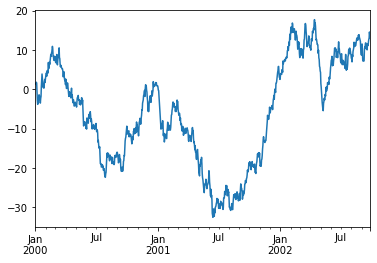

In [113]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()

ts.plot();

<Figure size 432x288 with 0 Axes>

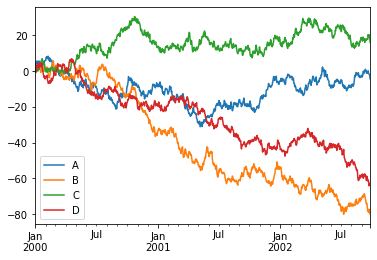

In [114]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure();
df.plot();

plt.legend(loc='best');

## Getting data in/out

In [115]:
df.to_csv("foo.csv")

In [116]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.006728,0.240002,1.343879,-0.681200
1,2000-01-02,4.262139,1.929598,0.482706,-0.101422
2,2000-01-03,3.403106,2.942316,-0.609469,-0.167077
3,2000-01-04,5.295020,3.206766,0.559948,0.649559
4,2000-01-05,4.931878,3.533644,2.144697,3.200031
...,...,...,...,...,...
995,2002-09-22,-1.423826,-78.848549,18.988124,-62.668373
996,2002-09-23,-1.600558,-77.266517,20.142986,-64.110307
997,2002-09-24,-1.867351,-77.592266,20.343605,-63.485420
998,2002-09-25,-2.592075,-79.801152,18.887859,-63.251524


In [122]:
df.to_hdf("foo.h5", "df")

In [123]:
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,0.006728,0.240002,1.343879,-0.681200
2000-01-02,4.262139,1.929598,0.482706,-0.101422
2000-01-03,3.403106,2.942316,-0.609469,-0.167077
2000-01-04,5.295020,3.206766,0.559948,0.649559
2000-01-05,4.931878,3.533644,2.144697,3.200031
...,...,...,...,...
2002-09-22,-1.423826,-78.848549,18.988124,-62.668373
2002-09-23,-1.600558,-77.266517,20.142986,-64.110307
2002-09-24,-1.867351,-77.592266,20.343605,-63.485420
2002-09-25,-2.592075,-79.801152,18.887859,-63.251524
